In [2]:
%display typeset

# Equações diferenciais

#### Pablo de Maio
Uma equação diferencial (determinística) é uma equação cuja incógnita é uma função diferenciável. Equações diferenciais ordinárias são aquelas que possuem apenas derivadas em relação a uma única variável. Equações diferenciais parciais, são aquelas que contém derivadas (parciais) em relação a uma ou mais variáveis. 

Dada a natureza da diferenciabilidade, é fácil concluir que esse tipo de equação tem grande importância na modelagem de fenômenomenos que envolvem a variação de uma quantidade em relação a outra, como crescimento de populações, propagação do calor, posição de um objeto em movimento, preço de ativos, dinâmica dos fluídos, dentre quase uma infinidade de aplicações. 

Vamos fechar o escopo desse seminário em sistemas de EDO's, ou como vamos nos referir, EDO's em $\mathbb{R^n}$ .

### EDO's em $\mathbb{R}^n$

Dada uma função vetorial ${x}:\mathbb{R} \rightarrow \mathbb{R^n}$, uma EDO em $\mathbb{R}^n$ tem a forma

$$ x'(t) = f(t, x(t)),~~ x(0) = v.~~~ (eq.1)$$

onde $f$ é contínua e $v \in \mathbb{R^n}$ uma constante que representa o estado inicial do sistema, e é dita uma  condição inicial.

#### Sistemas autônomos e não-autônomos 

Quando $f$ depende diretamente de $t$ (como na equação acima), a EDO é dita **não-autônoma**, e quando a função $f$ da equação acima depende diretamente apenas de $x(t)$, esta EDO é dita **autônoma**.

Quando estamos no universo das EDO's determinísticas, ou seja, sistemas que não dependem de nenhuma variável aleatória, sempre podemos transformar equações não-autônomas em $\mathbb{R}^{n}$ em equações autônomas em $\mathbb{R}^{n+1}$  com uma simples mudança de variáveis tomando

$$u(t) := (t,x(t)^T)^T$$

Temos que a equação 1 fica na forma

$$ u'(t) = f(u(t)),~~ u(0) = (0,x(0)^T)^T.~~~(eq.2)$$

#### Existência e unicidade 

##### Teorema 2.1.3 (Stuart e Humphries)
Seja $f:\mathbb{R}^n \rightarrow \mathbb{R}^n$ uma função [Lipschitz contínua](https://en.wikipedia.org/wiki/Lipschitz_continuity) em $\mathbb{R}^n$. Então existe uma solução $u(t)$ para a eq.2 para todo $t \in \mathbb{R}$. 

**Demonstração** (Stuart e Humphries pg. 102)

**Obs.:** Se $f$ é localmente Lipschitz em uma bola aberta $B$ de $\mathbb{R}^n$, então a eq.2 tem uma solução $u(t)$ em $B$.  (Stuart e Humphries pg. 104-105).

#### EDO's de ordem superior
(A ordem de uma EDO é a ordem da derivada de maior ordem que aparece na equação.)

De forma similar ao que fizemos para Sistemas não-autônomos, sempre podemos transformar uma EDO de ordem superior, em uma EDO de ordem 1 adicionando dimensões à equação.

Desta forma, vamos focar o nosso estudo em sistemas autônomos de 1ª ordem, uma vez que sempre podemos reduzir o nosso problema a este tipo de sistema.

### Exemplo  ([Oscilador de Van der Pol](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator))

Vamos exemplificar a mudança de variáveis com um oscilador de Van der Pol dado por 
$$x''(t) + a x'(t)(x^2(t)-1) +b x(t)=0$$ 

Esta é uma equação de 2ª ordem, e vamos transformá-la em um sistema de 1ª ordem com a seguinte mudança de variáveis

$$ y_0'(t) = y_1(t)~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$
$$ y_1'(t) = a y_1(t)\left(1 - y_0^2(t)\right) -b y_0(t)$$


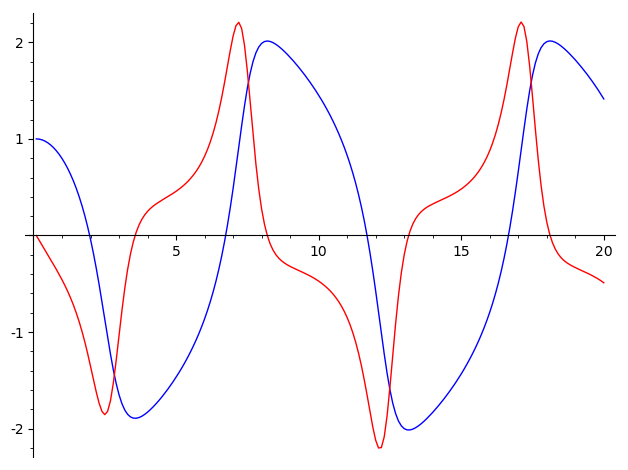

In [1]:
# Numerical solution with runga-kutta prince-dormand 
# algorithm. Just to show some plots.
a = 1
b=0.5
var('y0 y1 t')
ode_rhs = [y1, a*((1-(y0^2))*y1-b*y0)]
points = desolve_system_rk4(ode_rhs,[y0,y1],ics=[0.1,1,0],ivar=t,end_points=20,step=0.1)

ty0_points = [ [i,j] for i,j,k in points]
ty1_points = [ [i,k] for i,j,k in points]
list_plot(ty0_points, plotjoined=True) + list_plot(ty1_points, plotjoined=True, color='red')




In [4]:
# desolve não consegue resolver Van der Pol de 2a ordem.
a = 1
b=0.5
t = var('t')
x = function('x')(t)
desolve(diff(x,t,2) + a*diff(x,t)*(x^2-1) +b*x,x, contrib_ode=True)

NotImplementedError: Maxima was unable to solve this ODE.

Com `desolve_system` podemos resolver a versão de Van der Pol como sistema dde primeira ordem.

In [10]:
var('a b y0 y1')
y0 = function('y0')(t)
y1 = function('y1')(t)
dy0= diff(y0,t)==y1
dy1= diff(y1,t)==a*((1-(y0^2))*y1-b*y0)
desolve_system([dy0,dy1],[y0,y1], ivar=t)

[y0(t) == ilt(-(a*laplace(y0(t)^2*y1(t), t, g2008) + a*y0(0) - g2008*y0(0) - y1(0))/(a*b - a*g2008 + g2008^2), g2008, t),
 y1(t) == ilt(-(a*b*y0(0) + (a*laplace(y0(t)^2*y1(t), t, g2008) - y1(0))*g2008)/(a*b - a*g2008 + g2008^2), g2008, t)]

In [ ]:
y0y1_points = [ [j,k] for i,j,k in points]
list_plot(y0y1_points, plotjoined=True, color='red') + sum(arrow2d(p[1:], vector(p[1:]) + vector([eqn_rhs.subs({t : p[0], y0 : p[1], y1: p[2]}) for eqn_rhs in ode_rhs]).normalized()*0.03,arrowsize=1,color='blue') for p in points if p[1] >= 0)

### Exemplo 2 ([Equação de Lane-Emden](https://pt.wikipedia.org/wiki/Equação_de_Lane-Emden))

A equação de Lane-Emden é um modelo para descrever a densidade e a pressão no interior das anãs brancas, e é dada por

$$ x''(t) + \frac{2}{t} x'(t) + \sqrt{x^3(t)} = 0 $$

fazendo as mudanças necessárias obtemos

$$y'(t) = \left( \begin{array}
?y_0'(t)\\
y_1'(t)\\
y_2'(t)
\end{array} \right)= \left( \begin{array} 
 ~1\\
y_2(t)\\
-\frac{2}{y_0} y_2 - \sqrt{y_1^3}
\end{array} \right)
$$






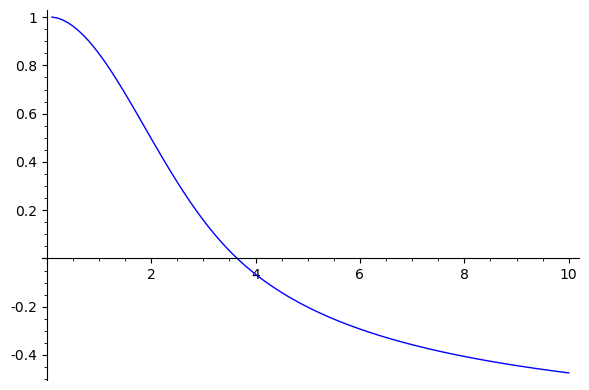

In [6]:
var('y0 y1 t')
ode_rhs = [y1, -2/t*y1 - y0^(3/2)]
points = desolve_system_rk4(ode_rhs,[y0,y1],ics=[0.1,1,0],ivar=t,end_points=10,step=0.1)

ty0_points = [ [i,j] for i,j,k in points]
list_plot(ty0_points, plotjoined=True)

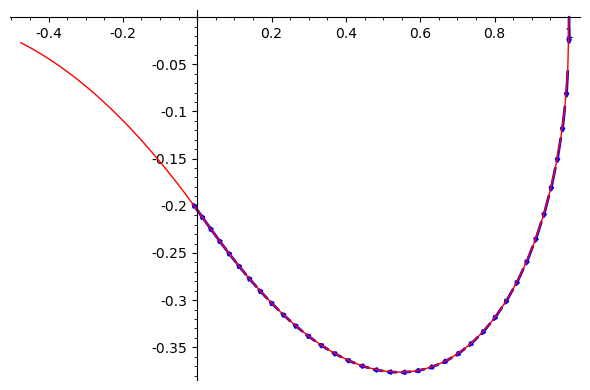

In [7]:
y0y1_points = [ [j,k] for i,j,k in points]
list_plot(y0y1_points, plotjoined=True, color='red') + sum(arrow2d(p[1:], vector(p[1:]) + vector([eqn_rhs.subs({t : p[0], y0 : p[1], y1: p[2]}) for eqn_rhs in ode_rhs]).normalized()*0.03,arrowsize=1,color='blue') for p in points if p[1] >= 0)

### EDO's Lineares

Dizemos que uma EDO é linear quando ela é dada por 

$$u'(t) = A.u(t)$$

onde A é uma matriz $n \times n$. 
É muito fácil calcular a solução desse tipo de equação, basta um pouco de cálculo, e obtemos $u(t) = u_0 . e^{A.t}$. Isso vai motivar o que vem a seguir.

### Pontos de equilíbrio ou singularidades

Na teoria dos sistema dinâmicos um ponto ${\displaystyle {\tilde {x}}}$ é dito um ponto de equilíbrio se uma vez que o sistema se encontrar em tal ponto, nele permanecerá. Ou seja, se $\tilde{x}$ é um ponto de equilíbrio, então existe $t_0 \in \mathbb{R}$ tal que
$$x'(t_0)=0 \implies \tilde{x} = x(t_0)$$
$${x (t_0)= {\tilde {x}}  \implies {x} (t)={\tilde {x}},~~~\forall t\geq t_0}$$

Essa definição é valida tanto no caso continuo, quanto no caso discreto.

Pontos de equilíbrio também são conhecidos como **estado estacionário**.

### Estabilidade

Um ponto de equilíbrio $\tilde{x}$ é *estável*, se dado $\epsilon>0$, existe $\delta>0$, tal que para $|x_0-\tilde{x}|<\epsilon$, a solução do problema de valor inicial dado pela eq.2 é tal que $|x(t)-\tilde{x}|<\delta$ para todo $t \geq 0 $. 



Ou seja, pequenas pertubações nas condições iniciais, geram pequenas pertubações na solução. 

Um ponto de equilíbrio é dito *instável* quando ele não é estável. 

Um ponto de equilíbrio é *assintóticamente estável* se para toda condição inicial dentro de uma vizinhança do ponto de equilíbrio o sistema converge para o ponto de equilíbrio .

## Análise de estabilidade linear

A idéia aqui é analisar o sistema ao redor dos seus pontos de equilíbrio, para tal vamos introduzir um conceito conhecido como linearização, e apróximar o sistema ao redor de seus pontos de equilíbrio.

### Linearização

Agora, suponhamos que $\tilde{x}$ é um ponto de equilíbrio de uma equação autônoma (eq.2), então sabemos que $f(\tilde{x})=0$. Então vamos observar a expansão de Taylor da função $f$ ao redor do ponto de $\tilde{x}$. 

$$x' = \sum_{j=0}^\infty \left.\frac{\partial^j f}{\partial x^j}\right|_{\tilde{x}} . \frac{(x-\tilde{x})^j}{j!}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$  

$$= f(\tilde{x}) + f_x(\tilde{x}). (x - \tilde{x}) + f_{xx} (\tilde{x}) . \frac{(x-\tilde{x})^2}{2} ...$$

Tomando a expansão acima até a primeira derivada, obtemos uma aproximação de $f$ ao redor do ponto de equilíbrio. Note que a derivada parcial $f_x(x)$ é a matrix jacobiana $J_f(x)$ de $f$ avaliada em $x$. 

Então se temos que $\Delta x = x-\tilde{x}$, temos que $\Delta x ' = x'$, logo

$$ \Delta x' = J_f(\tilde{x}) . \Delta x$$

**Teorema** Um ponto de equilíbrio $\tilde{x}$ de uma equação diferencial é estável se todos os autovalores de $J_f(\tilde{x})$ tem partes reais negativas. O ponto de equilíbrio é instável, se ao menos um dos autovalores tem parte real positiva.  

No Stuart e Humphries ele prova um teorema mais forte: Um ponto de equilíbrio $\tilde{x}$ de uma equação diferencial com autovalores $\{\lambda_i\}_{i=1,...,n }$ da matrix Jacobiana $J_f(\tilde{x})$, então 

*(i)* $\tilde{x}$ é *assintóticamente* estável se e só se $Re(\lambda_i) < 0$ para todo $i$.

*(ii)* Se $Re(\lambda_i) \leq 0$ para todo $i$, e os autovalores com parte real nula ($Re(\lambda_i$) = 0 ) são não-defeituosos ( ou seja, estes autovalores tem multiplicidade 1), então a origem é estável.

Obs.: Em tempo, uma matriz defeituosa é uma matriz $n \times n$ que tem menos que $n$ autovalores distintos, e portanto não é diagonalizável. 

### Exemplo: ([Lotka-Volterra](https://pt.wikipedia.org/wiki/Equação_de_Lotka-Volterra))

$$ x' = ax-bxy~~~$$
$$ y' = -cy + dxy$$

onde $a,b,c,d \in \mathbb{R}^+$, é fácil ver que temos pontos de equilíbrio em $(x,y)=(0,0)$, e em $(x,y) = (c/d,a/b)$.

Agora vamos linearizar ao redor de cada um dos pontos de equilíbrio.

$$J_f(x,y) = \left( \begin{array}[cc] a-by & -bx\\
                                       dy & -c+dx
                                       \end{array} \right)$$

 

In [8]:
#Autovalores para (x,y)=(0,0)
var('a b c d')
A = matrix([[a, 0],[0, -c]])
A.eigenvalues()

[-c, a]

In [9]:
#Autovalores para (x,y) = (c/d,a/b)
var('a b c d')
A = matrix([[a - c*c/d, -b*c/d],[d*a/b, -c+d*c/d]])
A.eigenvalues()

[-1/2*(c^2 - a*d + sqrt(c^4 - 2*a*c^2*d + (a^2 - 4*a*c)*d^2))/d,
 -1/2*(c^2 - a*d - sqrt(c^4 - 2*a*c^2*d + (a^2 - 4*a*c)*d^2))/d]

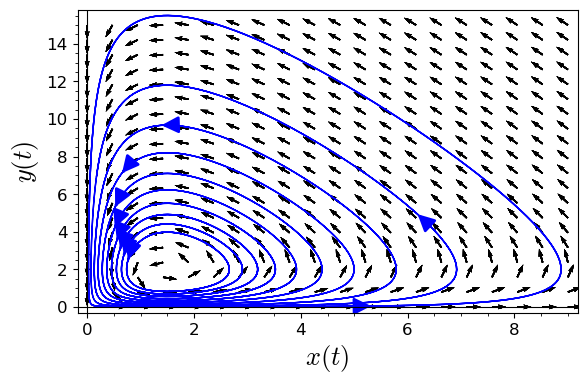

In [13]:
# Resolvendo com a=b=c=d=1
x, y, t = var('x y t')
F = [2*x - x*y, -3*y + 2*x*y]
P = desolve_system_rk4(F, [x, y], ics = [0,0.1,0.1], ivar = t, end_points = 10, step = 0.01)
Q = [ [j,k] for i,j,k in P]
p = line(Q)
for i2 in range(1,11):
    P = desolve_system_rk4(F, [x, y], ics = [0,0.1*i2,0.1*i2], ivar = t, end_points = 10, step = 0.01)
    Q = [ [j,k] for i,j,k in P]
    p += line(Q, axes_labels=['$x(t)$','$y(t)$'], fontsize=12, thickness=1)
    p += arrow(Q[int(len(Q)/5)], Q[int(len(Q)/5) + 1])
    n = sqrt(F[0]^2 + F[1]^2)
    F_unit = [F[0]/n, F[1]/n]
    p += plot_vector_field(F_unit, (x,0,9), (y,0,15), axes_labels=['$x(t)$','$y(t)$'])    
p

In [14]:
list(range(1,11))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

### Exemplos de pontos de equilíbrio

<p><a href="https://commons.wikimedia.org/wiki/File:Stability_Diagram.png#/media/File:Stability_Diagram.png"><img src="https://upload.wikimedia.org/wikipedia/commons/3/3b/Stability_Diagram.png" alt="Stability Diagram.png"></a><br>By &lt;a href="//commons.wikimedia.org/w/index.php?title=User:Freesodas&amp;amp;action=edit&amp;amp;redlink=1" class="new" title="User:Freesodas (page does not exist)"&gt;Freesodas&lt;/a&gt; - Gimp, <a href="https://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=67990034">Link</a></p>

$$sen(x) = \frac{e^{ix} - e^{-ix}}{2}$$
$$cos(x) = \frac{e^{ix} + e^{-ix}}{2}$$

In [15]:
#Autovalores
A = matrix([[-1, -1],[1, 1/5]])
A.eigenvalues()

[-0.4000000000000000? - 0.8000000000000000?*I, -0.4000000000000000? + 0.8000000000000000?*I]

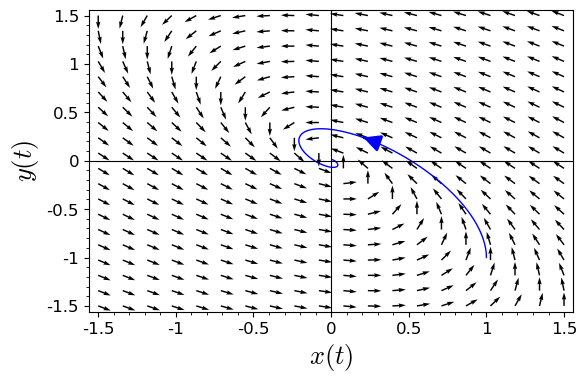

In [16]:
x, y, t = var('x y t')
F = [-x - y, x + y/5]
P = desolve_system_rk4(F, [x, y], ics = [0,1,-1], ivar = t, end_points = 10, step = 0.01)
Q = [ [j,k] for i,j,k in P]
p = line(Q, axes_labels=['$x(t)$','$y(t)$'], fontsize=12, thickness=1)
p += arrow(Q[int(len(Q)/5)], Q[int(len(Q)/5) + 1])
n = sqrt(F[0]^2 + F[1]^2)
F_unit = [F[0]/n, F[1]/n]
p += plot_vector_field(F_unit, (x,-1.5,1.5), (y,-1.5,1.5), axes_labels=['$x(t)$','$y(t)$'])
p

In [17]:
A = matrix([[-1, -1],[1, 1/5]])
A.eigenvalues()

[-0.4000000000000000? - 0.8000000000000000?*I, -0.4000000000000000? + 0.8000000000000000?*I]

In [18]:
A*matrix([[x],[y]])

[   -x - y]
[x + 1/5*y]

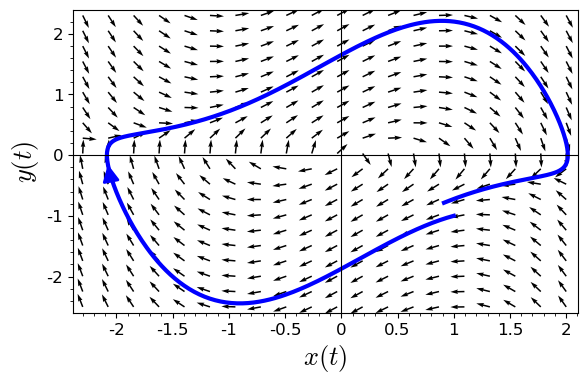

In [21]:
x, y, t = var('y0 y1 t')
a=1
b=0.5
F = [y1, a*((1-(y0^2))*y1-b*y0)]
P = desolve_system_rk4(F, [y0, y1], ics = [0,1,-1], ivar = t, end_points = 10, step = 0.01)
Q = [ [j,k] for i,j,k in P]
p = line(Q, axes_labels=['$x(t)$','$y(t)$'], fontsize=12, thickness=3)
p += arrow(Q[int(len(Q)/5)], Q[int(len(Q)/5) + 1])
n = sqrt(F[0]^2 + F[1]^2)
F_unit = [F[0]/n, F[1]/n]
p += plot_vector_field(F_unit, (x,-2.3,2), (y,-2.5,2.3), axes_labels=['$x(t)$','$y(t)$'])
p

## Estabilidade em sistemas dinâmicos

O que se segue foi *surrupiado* por inteiro do projeto [EcoVirtual](http://ecovirtual.ib.usp.br/doku.php?id=ecovirt:roteiro:math:stabilitysage)


Equilíbrio e estabilidade são conceitos muito importantes em ecologia, mas que comportam muitas definições. Uma das definições mais usadas foi trazida do ramo da física e da matemática chamada de análise de [sistemas dinâmicos](http://en.wikipedia.org/wiki/Dynamical_system).

É esta abordagem que trouxe para a ecologia equações para descrever a dinâmica de populações, como a [equação logística](http://en.wikipedia.org/wiki/Logistic_function#In_ecology:_modeling_population_growth) e o sistema de [equações de Lotka-Volterra](http://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equation).  

Há técnicas para avaliar se estes sistemas de equações têm pontos de equilíbrio, e se este equilíbrio é estável.  Este exercício é uma demonstração informal da análise de estabilidade de uma equação que representa um sistema dinâmico.  O objetivo é que você compreenda os conceitos de equilíbrio e estabilidade usadas em sistemas dinâmicos, para diferenciá-los de outras definições de equilíbrio e estabilidade usadas na ecologia. 

### O modelo logístico

Vamos fazer a análise de estabilidade da conhecida equação logística de crescimento populacional:

$$V \ = \ rN\ \left( 1-\frac{N}{K} \right)$$

Onde $V$ é a velocidade de crescimento da população ((o mesmo que dN/dt)), $r$ é a taxa intrínseca de crescimento populacional, e $K$ a capacidade de suporte.

In [22]:
def f_0(t,y,params):return[params[0]*y[0]*(1-y[0]/params[1])]
B=ode_solver()    
B.algorithm="rk8pd"
B.function=f_0
@interact
def _(r=slider(-1,1,0.05,default=0.2), K=slider(1,20,1, default=20), N0=slider(0,30,1,default=1)):
    B.ode_solve(y_0=[N0],t_span=[0,200],params=[r,K],num_points=499)
    a1=B.solution
    lista1=[]
    for i in range(len(a1)):    
        A1= [(a1[i][0],a1[i][1][0])]
        lista1=lista1+A1
    ln1= line(lista1,thickness=2.5, rgbcolor=(0,0,1), axes_labels=["Time","N"], ymin=0, ymax=20 )
    pt1=plot(ln1)
    show(pt1, figsize=[6,4])


#### Equilíbrio na logística


A pergunta básica da análise de estabilidade em sistemas dinâmicos é se há **pontos de equilíbrio** estáveis. No caso da logística, estes pontos de equilíbrio são tamanhos populacionais. Mas primeiro vamos definir equilíbrio:



O tamanho populacional em equilíbrio é aquele em que a velocidade de crescimento é nula, ou seja em que 

$$\frac{dN}{dt} = 0$$





Há dois tamanhos populacionais que satisfazem esta condição para a equação logística:

  * $N \ = \ K$
  * $N \ = \ 0$

Estes tamanhos em equilíbrio fazem sentido biológico: a população não cresce quando chega à capacidade de suporte ou, trivialmente, quando está vazia.

Verifique que estes dois tamanhos populacionais estão em equilíbrio no gráfico interativo da seção anterior. Para isso, é só fazer o tamanho inicial da população (argumento ''N0'') igual aos tamanhos em equilíbrio. 


### Estabilidade da logística 

Algum destes pontos de equilíbrio são estáveis? Vamos experimentar com um novo gráfico, mas antes precisamos definir de que estabilidade estamos falando:


Um tamanho populacional em equilíbrio é **localmente estável** se a população retorna a ele após uma pequena perturbação.

</WRAP>



Uma pequena perturbação é um pequeno acréscimo ou redução do tamanho populacional. Clique no botão ''Evaluate'' abaixo para plotar a logística com dois argumentos para incluir perturbações:

  * ''Disturb'' : valor da perturbação
  * ''Disturb time'' : momento da perturbação

Aumente em meio ou um o tamanho das populações que estejam com tamanhos iguais a zero e $K$ ((rigorosamente isso não seria uma perturbação tão pequena assim, mas funciona com este sistema)).

=== Perguntas ===
  * Há pontos estáveis?
  * Qual a interpretação biológica?

In [23]:
def f_0(t,y,params):
    return[params[0]*y[0]*(1-y[0]/params[1])]
B=ode_solver()    
B.algorithm="rk8pd"
B.function=f_0
@interact
def _(r=slider(0,1,0.05,default=0.2), K=slider(11,20,1, default=20), N0=slider(0,30,1,default=1), t_perturb=slider(0,200,1,default=100, label='Disturb time'), 
perturb=slider(-10,10,0.5,default=0, label='Disturb') ):
    B.ode_solve(y_0=[N0],t_span=[0,t_perturb],params=[r,K],num_points=499)
    a1=B.solution
    B.ode_solve(y_0=[a1[499][1][0]+perturb],t_span=[0,200-t_perturb],params=[r,K],num_points=500)
    a2=B.solution
    lista1=[]
    for i in range(len(a1)):    
        A1= [(a1[i][0],a1[i][1][0])]
        lista1=lista1+A1
    for i in range(len(a2)):    
        A2= [(a2[i][0]+t_perturb,a2[i][1][0])]
        lista1=lista1+A2
    ln1= line(lista1,thickness=2.5, rgbcolor=(0,0,1), axes_labels=["Time","N"], ymin=0, ymax=K*1.1 )
    pt1=plot(ln1)
    show(pt1, figsize=[6,4])

#### Interpretação matemática

O critério de estabilidade que usamos avalia o comportamento da velocidade de crescimento, quando o tamanho populacional varia **um pouco** em torno do equilíbrio. Como é a relação entre velocidade de crescimento e tamanho populacional na equação logística? 

Veja a figura abaixo: a velocidade tem uma relação quadrática com o tamanho populacional, formando uma parábola. Os pontos de equilíbrio, em que a velocidade de crescimento é zero, estão marcados em vermelho ((Eles são as raízes da equação quadrática.)). 

![Velocidade de crescimento ,V ou dN/dt, em função do tamanho populacional em uma equação logística. Parâmetros: r=0,1 , K=50](logist1.png)

Quando a população é pequena, seu crescimento faz a velocidade de crescimento aumentar, ou seja, o tamanho populacional acelera seu crescimento. 

A partir de um certo tamanho populacional, chamado ponto de inflexão da curva, o aumento na população faz a velocidade diminuir. Deste ponto em diante o tamanho populacional freia ((na terminologia de física, isso é aceleração negativa)) o seu crescimento. 

Isso é a própria expressão da equação logística: crescimento próximo do exponencial quando a população é pequena, e redução da velocidade até a parada, quando a população chega à capacidade de suporte. Logo, a velocidade tem uma relação positiva com o tamanho populacional **próximo** ao equilíbrio $N=0$. Portanto, um **pequeno** aumento acima de zero aumenta a velocidade de crescimento, que aumenta o tamanho populacional, que aumenta ainda mais a velocidade de crescimento. Este é um equilíbrio instável: basta uma pequena perturbação para afastar a população dele.

No ponto $N=K$ acontece o oposto: a velocidade tem uma relação negativa com o tamanho populacional. Se diminuímos a população **um pouco** abaixo de $K$, ela crescerá, mas este crescimento reduzirá a velocidade de crescimento até que a velocidade seja nula. Se aumentamos a população **um pouco** acima da capacidade de suporte, a velocidade será negativa ((certifique-se que viu isto na figura)), e a população reduzirá até chegar a $K$, pois a velocidade negativa também desacelera. Assim, perturbações **na vizinhança** da capacidade de suporte são atraídas de volta para este ponto.

Em resumo, o que define a estabilidade **em torno** de um ponto de equilíbrio é o sinal da relação entre a velocidade de crescimento e o tamanho populacional **nesta vizinhança**. Isto é aproximado pelo sinal da inclinação de uma reta tangente ao ponto de equilíbrio, que é a derivada da velocidade em relação ao tamanho populacional, **nestes pontos**.

Abaixo está um botão para criar o gráfico interativo da mesma parábola da figura anterior, agora com uma tangente a um ponto da função, que você escolhe com o argumento ''Evaluation point''. Verifique que a inclinação da reta é positiva **no ponto** $N=0$ e negativa **no ponto** $N=K$.

In [1]:
var('N')
@interact
def _(r=slider(0,1,0.05,default=0.2), K=slider(1,20,1, default=20), N_init=slider(0,20,1, default=0, label='Evaluation point')):
    ## Grafico da velocidade x N
    f = r*N*(1-N/K)
    ft = f.taylor(N,N_init,1)  
    pf= plot(f,0,K,color='blue', axes_labels=["N","dN/dt"], thickness=1.5)
    pt=point((N_init,f(N=N_init)), color='red', pointsize=40)
    pft=plot(ft, N_init-(0.1*K), N_init+(0.1*K), color='red')
    plt=pf+pt+pft  
    show(plt, figsize=[5,5])

Com isso chegamos a um critério de estabilidade **local** para uma população com crescimento em tempo contínuo:

Em notação matemática este critério é:

$$\frac{dV}{dN} \bigg|_{N^*} \ < \ 0$$

o que se lê "a derivada de $V$ em relação a $N$ no ponto $N^*$ é menor que zero".



### Estabilidade de Liapunov  

Adaptado de [Marc R. Roussel](http://people.uleth.ca/~roussel/nld/stability.pdf), e Stuart e Humphries.

A análise de estabilidade linear nos mostra como os sistemas se comportam próximos aos pontos de equilíbrio, entretanto, não nos diz nada sobre o que acontece longe do equilíbrio. A análise do plano de fase combinada com a análise linear em geral nos mostra uma visão geral da dinâmica do sistema, mas as coisas ficam bem mais complicadas em espaços com muitas dimensões. Então vamos tentar apresentar o que é conhecido como **análise de estabilidade de Lyapunov**, que pode ser usada para determinar a estabilidade tanto na vizinhança de um ponto de equilíbrio quanto distante dele. 

Suponhamos que $V(x)$ é uma função da variável estado, que tem um mínimo em um ponto de equilíbrio, e não possua máximos locais, como um ![parabolóide](https://upload.wikimedia.org/wikipedia/commons/9/9c/ParaboloidOfRevolution.png) 

Agora suponha que podemos mostrar que a dinâmica do sistema resulta em um decrescimento em $V$ em alguma vizinhança do ponto de equilíbrio. Isso quer dizer que estamos tentendo em direção ao mínimo da função $V$.

Esse tipo de função $V$ é conhecida como função de **Liapunov**.

**Definição:** Uma função $V \in C^1 (\mathbb{R}^n,\mathbb{R})$ é dita uma *função de Lyapunov* em $\tilde{x}$ para a equação 2 se

$$\frac{d}{dt} [V(x(t))] \leq 0 $$

para todo $x$ em uma vizinhança $B$ de $\tilde{x}$.

Se além disso, $V(\tilde{x})=0$ e $V(x) > 0 \in B(\tilde{x})$, então $V$ é dita uma função de Lyapunov positiva definida.

**Teorema** Seja $\tilde{x}$ um ponto de equilíbrio de uma EDO, e seja $V$ Lyapunov positiva definida, então $\tilde{x}$ é assintóticamente estável para condições iniciais em uma vizinhança $B(\tilde{x})$ se $\frac{d}{dt} [V(x(t))]<0$ para todo $x\in B(\tilde{x}) \sim \{\tilde{x}\}$. 


### Exemplo: A [Lei de Hooke](https://en.wikipedia.org/wiki/Hooke's_law)
    
Um sistema massa mola com atrito, tem sua força $F$ representada por

$$F=ma = -kx-\mu v.$$

onde $x$ é o deslocamento da posição de equilíbrio, $k$ é a constante elástica, $v$ é a velocidade com que a mola volta a posição original, e $\mu$ é uma constante de proporcionalidade (e portanto $\mu \geq 0$).                     
$$v = x_t$$ 
$$a = v_t$$

Então podemos obter o sistema no plano

$$x_t = v~~~~~~~~~~~~~~~~~~~~$$
$$v_t = \frac{1}{m}(-kx-\mu v)$$

O ponto de equilíbrio desse sistema está em $(\tilde{x},\tilde{v})=(0,0)$. Em sistemas com atrito, a energia total é também uma função de lIapunov. Como a foça $F$ e a energia potencial $V$ são relacionadas por $F=-V_x$, a energia potencial associada com a força da Lei de Hooke é $\frac{1}{2}mv^2$, e a energia cinética é $\frac{2}{2}mv^2$ então a energia total é 
$$E=\frac{1}{2}\left(kx^2 + mv^2\right)$$. 

A função de energia total é positiva definida (zero no ponto de equilíbrio, e crescente a partir daí). Então temos que $E$ é uma função de *Lyapunov*, e tomando a sua derivada em relação ao tempo, obtemos

$$\frac{dE}{dt} = -\mu v² <0$$

Como $E$ descrece em toda parte, exceto no ponto de equilíbrio, temos pelo teorema acima, que $(\tilde{x},\tilde{v})$ é assintóticamente estável.

Muito mais sobre [estabilidade de Lyapunov](http://www.cpdee.ufmg.br/~torres/wp-content/uploads/2018/02/Estabilidade_Lyapunov.pdf).